TensorFlow是谷歌研发的第二代人工智能学习系统，其命名来源于本身的运行原理。Tensor也叫张量，即所谓的N维数组；Flow也叫流，即所谓基于数据流图的计算；TensorFlow为张量从流图的一端流动到另一端的计算过程。TensorFlow将复杂的数据结构传输至人工智能神经网中进行分析和处理。

把算法表示成一个个操作的叠加，可以非常清晰地看到数据之间的关系，而且这样的基本操作也具有普遍性。在TensorFlow中，当数据流过操作节点的时候就可以对数据进行操作。一个操作可以有零个或多个输入，产生零个或多个输出。一个操作可能是一次数学计算，一个变量或常量，一个数据流走向控制，一次文件IO或者是一次网络通信。其中，一个常量可以看成没有输入、只有一个固定输出的操作。

在计算图中，每个边就代表数据从一个操作流到另一个操作。这些数据被表示为张量，一个张量可以看成多维的数组或者高维的矩阵。关于TensorFlow中的张量，需要注意的是张量本身并没有保存任何值，张量仅仅提供了访问数值的一个接口，可以看成数值的一种引用。在TensorFlow实际使用中我们也可以发现，在run之前的张量并没有分配空间，此时的张量仅仅表示了一种数值的抽象，用来连接不同的节点，表示数据在不同操作之间的流动。(相当于只是先分配了一个名额，等实际用到时，才会给你实际赋值)

变量是计算图中可以改变的节点。比如当计算权重的时候，随着迭代的进行，每次权重的值会发生相应的变化，这样的值就可以当作变量。在实际处理时，一般把需要训练的值指定为变量。在使用变量的时候，需要指定变量的初始值，变量的大小和数据类型就是根据初始值来推断的。

在TensorFlow中，所有操作都必须在会话（session）中执行，会话负责分配和管理各种资源。在会话中提供了一个run方法，可以用它来执行计算图整体或者其中的一部分节点。在执行run方法时，还需要用feed_dict把相关数据输入到计算图。当run被调用时，TensorFlow将会从指定的输出节点开始，向前查找所有的依赖节点，所有依赖节点都将被执行。这些操作随后将被分配到物理执行单元上（比如CPU或GPU），这种分配规则由TensorFlow中的分配算法决定。（实际是为每个会话分配了独立的内存空间）

TensorFlow与Scikit-Learn的区别除了支撑的算法不一样，还有一个重要的区别——TensorFlow天生支持分布式和异构计算环境，从单机到集群，从CPU到GPU都支持良好。

TensorFlow也支持分布式架构，从MAC本到CPU服务器、GPU服务器、GPU集群甚至是神秘的TPU集群都支持。

In [1]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [2]:
def get_onehot(y, size=10):
    y_hot = []
    y_ = []
    for i in y:
        y_ = [0] * size
        y_[i-1] = 1
        y_hot.append(y_)
        y_ = []
    return np.array(y_hot)

In [3]:
mnist_train, mnist_test = mnist.load_data()
X_train = mnist_train[0].reshape(mnist_train[0].shape[0], mnist_train[0].shape[1] * mnist_train[0].shape[2]) / 255.0
y_train = get_onehot(mnist_train[1])
X_test = mnist_test[0].reshape(mnist_test[0].shape[0], mnist_test[0].shape[1] * mnist_test[0].shape[2]) / 255.0
y_test = get_onehot(mnist_test[1])

In [4]:
# 定义输入和输出，使用函数placeholder占位

X = tf.placeholder("float", [None, 784])
y_ = tf.placeholder("float", [None, 10])

In [5]:
# 定义初始化权重矩阵和截距

W = tf.Variable(tf.ones([784, 10]))
b = tf.Variable(tf.ones([10]))

In [6]:
# 定义预测函数，y是预测值，y_是真实值

y = tf.nn.softmax(tf.matmul(X, W) + b)

In [7]:
# 定义损失函数和优化算法

cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [8]:
# 初始化变量并定义会话，每个会话都独立

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [9]:
# 定义batchsize，使用小批量随机梯度进行优化迭代，理想情况，应使用所有全量数据一次性计算梯度，但数据量超大情况下，计算量显而易见

batchsize = 100

In [10]:
for i in range(0, len(X_train), batchsize):
    batch_xs = X_train[i:(i+batchsize)]
    batch_ys = y_train[i:(i+batchsize)]
    # 迭代计算损失
    sess.run(train_step, feed_dict={X:batch_xs, y_:batch_ys})

In [11]:
# 验证正确率

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # 转换数据类型
# 计算准确率
print(sess.run(accuracy, feed_dict={X: X_test, y_: y_test}))

0.897


In [12]:
# 定义输入，输出和dropout

X = tf.placeholder("float", [None, 784])
y_ = tf.placeholder("float", [None, 10])
keep_prob = tf.placeholder(tf.float32)

In [13]:
# 定义权重，截距和隐层

in_units = 784
h1_units = 300

W1 = tf.Variable(tf.truncated_normal([in_units, h1_units], stddev=0.1))
b1 = tf.Variable(tf.zeros([h1_units]))
W2 = tf.Variable(tf.zeros([h1_units, 10]))
b2 = tf.Variable(tf.zeros([10]))

In [14]:
# 定义激活函数、dropout和预测函数

hidden1 = tf.nn.relu(tf.matmul(X, W1) + b1)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)
y = tf.nn.softmax(tf.matmul(hidden1_drop, W2) + b2)

In [15]:
# 定义损失函数，和优化函数

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), axis=1))
train_step = tf.train.AdagradOptimizer(0.3).minimize(cross_entropy)

In [16]:
# 初始化变量并定义会话

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [17]:
# 定义小批量梯度下降

batchsize = 100

for i in range(0, len(X_train), batchsize):
    batch_xs = X_train[i:i+batchsize]
    batch_ys = y_train[i:i+batchsize]
    sess.run(train_step, feed_dict={X:batch_xs, y_:batch_ys, keep_prob:0.8})

In [18]:
# 验证

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={X: X_test, y_: y_test, keep_prob: 1.0}))

0.9538


In [19]:
X = tf.placeholder("float", [None, 784])
y_ = tf.placeholder("float", [None, 10])
keep_prob = tf.placeholder("float")

In [20]:
in_units = 784
h1_units = 300
h2_units = 200
h3_units = 100

W1 = tf.Variable(tf.truncated_normal([in_units, h1_units], stddev=0.1))
b1 = tf.Variable(tf.zeros([h1_units]))
W2 = tf.Variable(tf.zeros([h1_units, h2_units]))
b2 = tf.Variable(tf.zeros([h2_units]))
W3 = tf.Variable(tf.zeros([h2_units, h3_units]))
b3 = tf.Variable(tf.zeros([h3_units]))
W4 = tf.Variable(tf.zeros([h3_units, 10]))
b4 = tf.Variable(tf.zeros([10]))

In [21]:
hidden1 = tf.nn.relu(tf.matmul(X, W1) + b1)
hidden2 = tf.nn.relu(tf.matmul(hidden1, W2) + b2)
hidden3 = tf.nn.relu(tf.matmul(hidden2, W3) + b3)
hidden_drop = tf.nn.dropout(hidden3, keep_prob)
y = tf.nn.softmax(tf.matmul(hidden_drop, W4) + b4)

In [22]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), axis=1))
train_step = tf.train.AdagradOptimizer(0.3).minimize(cross_entropy)

In [23]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [24]:
batchsize = 100

for i in range(0,len(X_train), batchsize):
    batch_xs = X_train[i:i+batchsize]
    batch_ys = y_train[i:i+batchsize]
    sess.run(train_step, feed_dict={X: batch_xs, y_: batch_ys, keep_prob: 0.5})

In [25]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={X: X_test, y_: y_test, keep_prob: 1.0}))

0.1028


当数据量不大时，SVM的效果很有可能优于深度学习。

垃圾邮件的危害：

* 占用网络带宽，造成邮件服务器拥塞，进而降低整个网络的运行效率。
* 侵犯收件人的隐私权，侵占收件人信箱空间，耗费收件人的时间、精力和金钱。
* 被黑客利用成为助纣为虐的工具。
* 严重影响ISP的服务形。
* 妖言惑众、骗人钱财、传播色情等内容的垃圾邮件，已经对现实社会造成了危害。

我们使用SpamBase这个入门级的垃圾邮件分类训练集来测试。SpamBase的数据不是原始的邮件内容而是已经特征化的数据，对应的特征是统计的关键字以及特殊符号的词频，一共58个属性，其中最后一个是垃圾邮件的标记位。

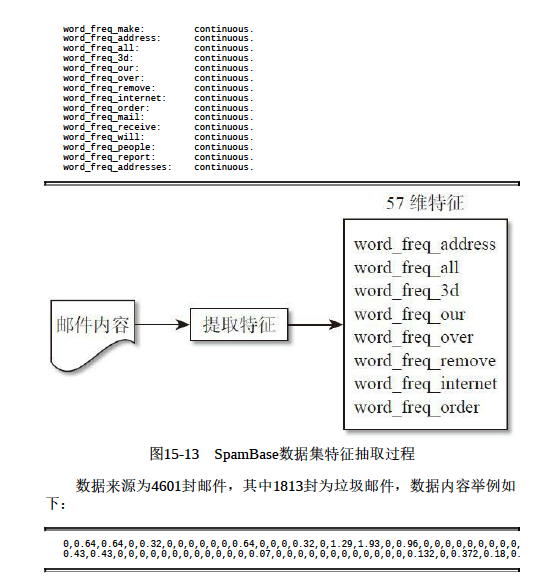

In [26]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [27]:
filename1 = './数据集/spambase/spambase.names'
f1 = open(filename1)
spambase_names = []
for line in f1.readlines()[33:]:
    spambase_names.append(line.split(':')[0])

spambase_names.append('label')

filename2 = './数据集/spambase/spambase.data'
spambase_features = pd.read_csv(filename2, names=spambase_names)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(spambase_features[spambase_features.columns[:-1]], spambase_features['label'])

In [29]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
mnb.score(X_test, y_test)

0.7932232841007819

In [31]:
y_train1 = get_onehot(y_train, size=2)
y_test1 = get_onehot(y_test, size=2)

In [32]:
X = tf.placeholder("float", [None, 57])
y_ = tf.placeholder("float", [None, 2])
keep_prob = tf.placeholder("float")

In [33]:
in_units = 57
h1_units = 30
h2_units = 15
ou_units = 2

W1 = tf.Variable(tf.truncated_normal([in_units, h1_units], stddev=0.1))
b1 = tf.Variable(tf.zeros([h1_units]))
W2 = tf.Variable(tf.zeros([h1_units, h2_units]))
b2 = tf.Variable(tf.zeros([h2_units]))
W3 = tf.Variable(tf.zeros([h2_units, ou_units]))
b3 = tf.Variable(tf.zeros([ou_units]))

In [34]:
hidden1 = tf.nn.relu(tf.matmul(X, W1) + b1)
hidden2 = tf.nn.relu(tf.matmul(hidden1, W2) + b2)
hidden_drop = tf.nn.dropout(hidden2, keep_prob)
y = tf.nn.softmax(tf.matmul(hidden_drop, W3) + b3)

In [35]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) , axis=1))
train_step = tf.train.AdamOptimizer(0.1).minimize(cross_entropy)

In [36]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [37]:
sess.run(train_step, feed_dict={X: X_train, y_: y_train1, keep_prob: 0.5})

In [38]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(accuracy, feed_dict={X: X_test, y_: y_test1, keep_prob: 1.0})

0.58992183

In [39]:
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
classifier = tf.contrib.learn.DNNClassifier((60, 20), feature_columns=feature_columns, n_classes=2)

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb5b82b7f0>, '_master': '', '_

In [40]:
classifier.fit(X_train, y_train, steps=1000, batch_size=10)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to the Estimator interface.
Instructions for up

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x1a71566358>, 'hidden_units': (60, 20), 'feature_columns': (_RealValuedColumn(column_name='', dimension=57, default_value=None, dtype=tf.float64, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x138cf6ea0>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [41]:
y_predict = np.array(list(classifier.predict(X_test)))

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/dq/s5dx7lqd1nl0kf3829swj_3w0000gn/T/tmporxp_ngr/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test, y_predict)

0.8801042571676803